In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline 
rcParams['figure.figsize']=20,10
sns.set(color_codes=True)

In [2]:
df = pd.read_csv('final_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9211 entries, 0 to 9210
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DATE                 9211 non-null   object
 1   ME_ID                9211 non-null   object
 2   DISEASE_ID           9211 non-null   object
 3   ORDER_QUANTITY       9211 non-null   object
 4   ORDER_FREE_QUANTITY  9211 non-null   int64 
 5   SOLD_QUANTITY        9211 non-null   object
 6   SOLD_FREE            9210 non-null   object
 7   MEDICINE_NAME        9211 non-null   object
 8   DISEASE_NAME         9211 non-null   object
 9   CITY                 9211 non-null   object
dtypes: int64(1), object(9)
memory usage: 719.7+ KB


In [3]:
# check missing value
print(df.isnull().sum())

DATE                   0
ME_ID                  0
DISEASE_ID             0
ORDER_QUANTITY         0
ORDER_FREE_QUANTITY    0
SOLD_QUANTITY          0
SOLD_FREE              1
MEDICINE_NAME          0
DISEASE_NAME           0
CITY                   0
dtype: int64


In [4]:
df[df.SOLD_FREE.isnull()].index.to_list()

[0]

In [5]:
# check the row when SOLD_FREE is NaN. looks like a valuable row to keep (ORDER_QUANTITY = 1076) 
df.iloc[270,:]

DATE                         31-12-2019
ME_ID                            AM2020
DISEASE_ID                       BL2020
ORDER_QUANTITY                        0
ORDER_FREE_QUANTITY                   0
SOLD_QUANTITY                       110
SOLD_FREE                            10
MEDICINE_NAME          AMLOKIND AT -TAB
DISEASE_NAME             BLOOD PRESSURE
CITY                           KANDUKUR
Name: 270, dtype: object

In [6]:
# SOLD_FREE is usually a percentage of SOLD_QUANTITY. So filling this with 0 should be fine.
# fill the NaN in SOLD_FREE with '0' because it was a string
df.SOLD_FREE = df.SOLD_FREE.fillna('0')

In [7]:
print(df.isnull().sum())

DATE                   0
ME_ID                  0
DISEASE_ID             0
ORDER_QUANTITY         0
ORDER_FREE_QUANTITY    0
SOLD_QUANTITY          0
SOLD_FREE              0
MEDICINE_NAME          0
DISEASE_NAME           0
CITY                   0
dtype: int64


In [8]:
# convert the following columns to numeric
df['ORDER_QUANTITY'] = pd.to_numeric(df.ORDER_QUANTITY.apply(lambda x: x.replace(',','').replace(' ','')))
df['SOLD_QUANTITY'] = pd.to_numeric(df.SOLD_QUANTITY.apply(lambda x: x.replace(',','').replace(' ','')))
df['SOLD_FREE'] = pd.to_numeric(df.SOLD_FREE.apply(lambda x: x.replace(',','').replace(' ','')))

In [9]:
# convert Date
df['DATE'] = pd.to_datetime(df.DATE, dayfirst = True)
# Add columns for year, month, day, weekday
df['year'] = df.DATE.apply(lambda x:x.year).astype(str)
df['month'] = df.DATE.apply(lambda x:x.month).astype(str)
df['day'] = df.DATE.apply(lambda x:x.day).astype(str)
df['weekday'] = df.DATE.apply(lambda x:x.weekday()).astype(str)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9211 entries, 0 to 9210
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE                 9211 non-null   datetime64[ns]
 1   ME_ID                9211 non-null   object        
 2   DISEASE_ID           9211 non-null   object        
 3   ORDER_QUANTITY       9211 non-null   float64       
 4   ORDER_FREE_QUANTITY  9211 non-null   int64         
 5   SOLD_QUANTITY        9211 non-null   float64       
 6   SOLD_FREE            9211 non-null   float64       
 7   MEDICINE_NAME        9211 non-null   object        
 8   DISEASE_NAME         9211 non-null   object        
 9   CITY                 9211 non-null   object        
 10  year                 9211 non-null   object        
 11  month                9211 non-null   object        
 12  day                  9211 non-null   object        
 13  weekday              9211 non-nul

In [11]:
df.head(10)

,DATE,ME_ID,DISEASE_ID,ORDER_QUANTITY,ORDER_FREE_QUANTITY,SOLD_QUANTITY,SOLD_FREE,MEDICINE_NAME,DISEASE_NAME,CITY,year,month,day,weekday
0,2019-04-01,AM2020,BL2020,1076.0,0,0.0,0.0,AMLOKIND AT -TAB,BLOOD PRESSURE,VIJAYAWADA,2019,4,1,0
1,2019-05-21,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2019,5,21,1
2,2019-05-21,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KAVALI,2019,5,21,1
3,2019-05-21,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,ONGOLE,2019,5,21,1
4,2019-05-21,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2019,5,21,1
5,2019-05-21,AM2020,BL2020,0.0,0,22.0,2.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2019,5,21,1
6,2019-05-22,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2019,5,22,2
7,2019-05-22,AM2020,BL2020,0.0,0,220.0,20.0,AMLOKIND AT -TAB,BLOOD PRESSURE,ONGOLE,2019,5,22,2
8,2019-05-23,AM2020,BL2020,0.0,0,55.0,5.0,AMLOKIND AT -TAB,BLOOD PRESSURE,ONGOLE,2019,5,23,3
9,2019-05-24,AM2020,BL2020,0.0,0,22.0,2.0,AMLOKIND AT -TAB,BLOOD PRESSURE,PAMUR,2019,5,24,4


In [12]:
df.describe()

,ORDER_QUANTITY,ORDER_FREE_QUANTITY,SOLD_QUANTITY,SOLD_FREE
count,9211.000000,9211.000000,9211.000000,9211.000000
mean,43.279883,1.622191,38.959071,2.295842
std,326.357535,20.184430,84.196034,12.493476
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,0.000000
50%,0.000000,0.000000,11.000000,0.000000
75%,0.000000,0.000000,40.000000,1.000000
max,10840.000000,950.000000,2400.000000,1000.000000


In [13]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (239, 14)


In [14]:
duplicate_rows_df.head(10)

,DATE,ME_ID,DISEASE_ID,ORDER_QUANTITY,ORDER_FREE_QUANTITY,SOLD_QUANTITY,SOLD_FREE,MEDICINE_NAME,DISEASE_NAME,CITY,year,month,day,weekday
4,2019-05-21,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2019,5,21,1
31,2019-06-04,AM2020,BL2020,0.0,0,11.0,1.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KAVALI,2019,6,4,1
83,2019-07-20,AM2020,BL2020,0.0,0,11.0,1.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2019,7,20,5
163,2019-10-11,AM2020,BL2020,0.0,0,33.0,3.0,AMLOKIND AT -TAB,BLOOD PRESSURE,CHIMAKURTHY,2019,10,11,4
169,2019-10-14,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,PODILI,2019,10,14,0
170,2019-10-14,AM2020,BL2020,0.0,0,550.0,50.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KANDUKUR,2019,10,14,0
183,2019-10-18,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KAVALI,2019,10,18,4
251,2019-12-14,AM2020,BL2020,0.0,0,110.0,10.0,AMLOKIND AT -TAB,BLOOD PRESSURE,VIJAYAWADA,2019,12,14,5
272,2020-01-01,AM2020,BL2020,0.0,0,55.0,5.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KAVALI,2020,1,1,2
273,2020-01-01,AM2020,BL2020,0.0,0,55.0,5.0,AMLOKIND AT -TAB,BLOOD PRESSURE,KAVALI,2020,1,1,2


In [15]:
df = df.drop_duplicates()

In [16]:
df.count()

DATE                   8972
ME_ID                  8972
DISEASE_ID             8972
ORDER_QUANTITY         8972
ORDER_FREE_QUANTITY    8972
SOLD_QUANTITY          8972
SOLD_FREE              8972
MEDICINE_NAME          8972
DISEASE_NAME           8972
CITY                   8972
year                   8972
month                  8972
day                    8972
weekday                8972
dtype: int64

In [17]:
df.describe()

,ORDER_QUANTITY,ORDER_FREE_QUANTITY,SOLD_QUANTITY,SOLD_FREE
count,8972.000000,8972.000000,8972.000000,8972.000000
mean,44.432791,1.665403,38.998105,2.303165
std,330.598795,20.449774,84.821373,12.635726
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,0.000000
50%,0.000000,0.000000,11.000000,0.000000
75%,0.000000,0.000000,40.000000,1.000000
max,10840.000000,950.000000,2400.000000,1000.000000


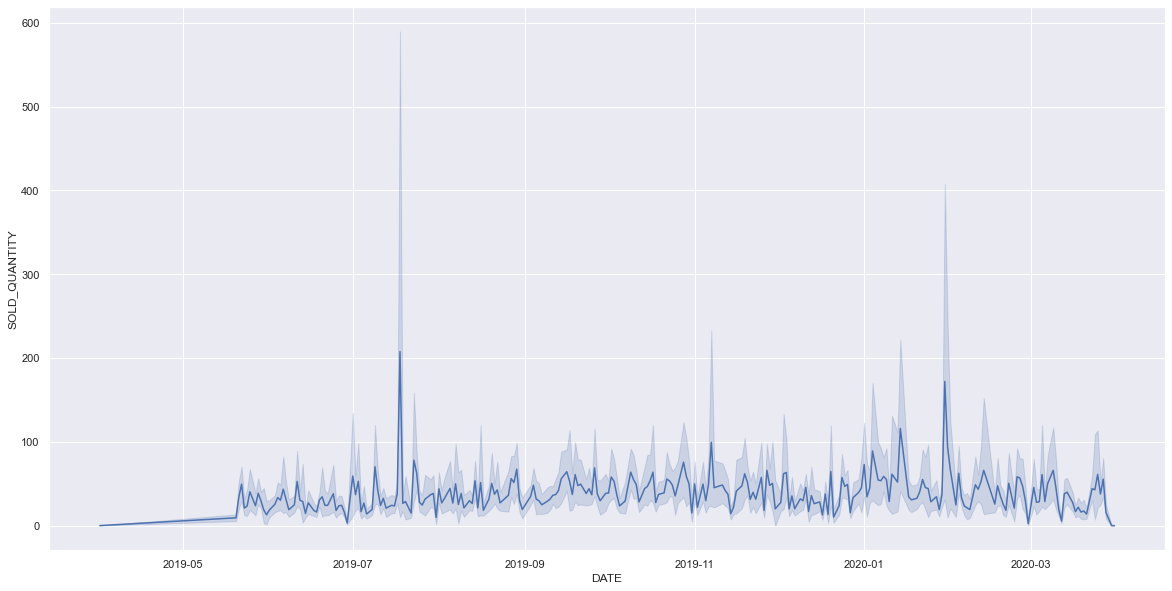

In [18]:
sns.lineplot(x="DATE", y="SOLD_QUANTITY", data=df)

In [19]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [20]:
test_result=adfuller(df['SOLD_QUANTITY'])

In [21]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(SOLD_QUANTITY):
    result=adfuller(SOLD_QUANTITY)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [22]:
adfuller_test(df['SOLD_QUANTITY'])

ADF Test Statistic : -5.186358758000529
p-value : 9.37374124927215e-06
#Lags Used : 35
Number of Observations Used : 8936
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [23]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

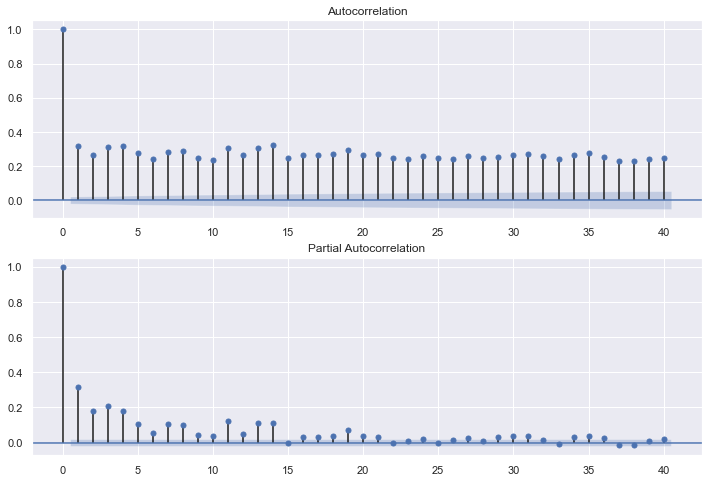

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['SOLD_QUANTITY'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['SOLD_QUANTITY'],lags=40,ax=ax2)

In [26]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['SOLD_QUANTITY'],order=(1, 0, 1))
results=model.fit()

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


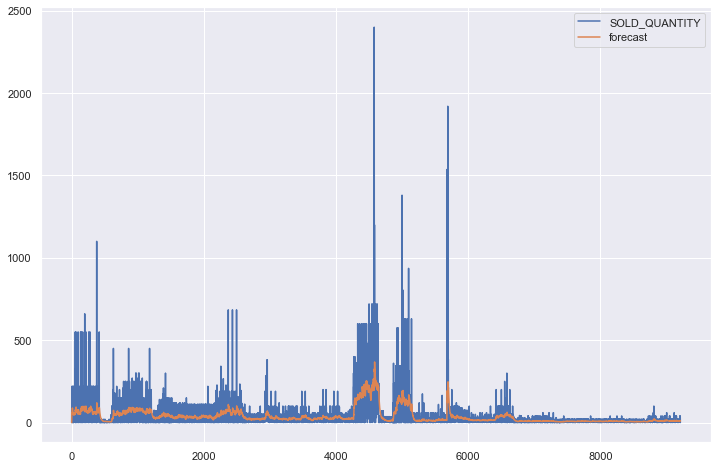

In [27]:
df['forecast']=results.predict()
df[['SOLD_QUANTITY','forecast']].plot(figsize=(12,8))

In [28]:
from sklearn. metrics import mean_squared_error
sqr_error = mean_squared_error(df.SOLD_QUANTITY, df.forecast)
sqr_error

5398.311780450827

In [29]:
np.sqrt(sqr_error)

73.4732045064786

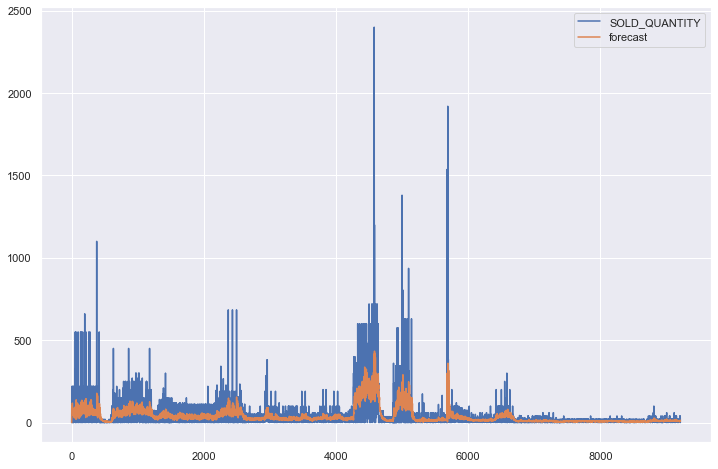

In [30]:
import warnings
warnings.filterwarnings('ignore')
model=sm.tsa.statespace.SARIMAX(df['SOLD_QUANTITY'],order=(27, 1, 1))
results=model.fit()
df['forecast']=results.predict()
df[['SOLD_QUANTITY','forecast']].plot(figsize=(12,8))

In [31]:
from sklearn. metrics import mean_squared_error
sqr_error = mean_squared_error(df.SOLD_QUANTITY, df.forecast)
np.sqrt(sqr_error)

72.46744419967166